In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2)

In [2]:
# Creating network, inicialization of parameters
# człowiek , ryba , ptak

import pandas as pd
import numpy as np
from Siec_plytka.init import init1
from Siec_plytka.dzialaj1 import calculate1, calculate2
from Siec_plytka.ucz1 import ucz1

examples = pd.read_csv('dane_uczace.csv')
examples = np.array(examples)

x_train = examples[:, :5]
y_train = examples[:, 5:]
print("Dane treningowe")
print(x_train)
print("Etykiety treningowe")
print(y_train)



Dane treningowe
[[ 4.    0.01  0.01 -1.   -1.5 ]
 [ 2.   -1.    2.    2.5   2.  ]
 [-1.    3.5   0.01 -2.    1.5 ]]
Etykiety treningowe
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [3]:
W_matrix = init1(5,3)  # 5 numbers in input, 3 neurons in layer1 (3 outputs)
print("Tak wyglądają zainicjalizowane wagi")
print(f"Wagi początkowe:\n {W_matrix}")
print(W_matrix.shape)

Tak wyglądają zainicjalizowane wagi
Wagi początkowe:
 [[ 0.06  0.01  0.09 -0.1   0.09]
 [-0.01 -0.03 -0.05  0.02 -0.01]
 [ 0.03 -0.1  -0.01  0.06 -0.04]]
(3, 5)


In [4]:
outputs_sigmoid = calculate1(W_matrix, x_train[0])
print(outputs_sigmoid)
print(len(y_train[0]))

[0.73 0.47 0.62]
3


In [5]:

#result1 = calculate1(W_matrix, x_train[0])
#print(calculate1(W_matrix,x_train))
print(f"x_train transpose: \n{np.transpose(x_train[0])} ")
min_error = 2e-3 # błąd który sieć ma osiągnąć


W_optimal, MSE = ucz1(W_matrix, x_train, y_train, 1000, min_error)
print("###############################################")
print(f"Wagi wytrenowane:\n {W_optimal}")
print(f"MSE 5 pierwszych błędów: {MSE[0:5]}")


x_train transpose: 
[ 4.    0.01  0.01 -1.   -1.5 ] 
result [0.73 0.47 0.62]
cost: [ 0.27 -0.47 -0.62]
TESTY
0.1
[[ 0.06  0.01  0.09 -0.1   0.09]
 [-0.01 -0.03 -0.05  0.02 -0.01]
 [ 0.03 -0.1  -0.01  0.06 -0.04]]
Koniec TESTOW
OBLICZANIE dj_dW:
expamples[random_sample]: [ 4.    0.01  0.01 -1.   -1.5 ]
derivative: [ 0.26 -0.59 -0.73]
Koniec
dj_dW: [[ 1.04e-01  2.59e-04  2.59e-04 -2.59e-02 -3.88e-02]
 [-2.36e-01 -5.90e-04 -5.90e-04  5.90e-02  8.85e-02]
 [-2.93e-01 -7.32e-04 -7.32e-04  7.32e-02  1.10e-01]]
_____________________________
cost [ 0.27 -0.47 -0.62]
cost.T [[ 0.27]
 [-0.47]
 [-0.62]]
[0.11]
result [0.82 0.26 0.55]
cost: [-0.82  0.74 -0.55]
TESTY
0.1
[[ 0.16  0.01  0.09 -0.12  0.05]
 [-0.24 -0.03 -0.05  0.07  0.08]
 [-0.26 -0.1  -0.01  0.14  0.07]]
Koniec TESTOW
OBLICZANIE dj_dW:
expamples[random_sample]: [ 2.  -1.   2.   2.5  2. ]
derivative: [-0.61  0.71 -0.68]
Koniec
dj_dW: [[-0.12  0.06 -0.12 -0.15 -0.12]
 [ 0.14 -0.07  0.14  0.18  0.14]
 [-0.14  0.07 -0.14 -0.17 -0.14]]
___

In [6]:
print("---------------------------------")
print("Teraz przewiduję:")
# print(f"W optimal:\n {W_optimal}")
# print(f"x_train:\n  {x_train}")
# przewidywania = calculate2(W_optimal, x_train)
# print(przewidywania)


outputs_sigmoid = calculate1(W_optimal, x_train[0])
print(outputs_sigmoid)
outputs_sigmoid = calculate1(W_optimal, x_train[1])
print(outputs_sigmoid)
outputs_sigmoid = calculate1(W_optimal, x_train[2])
print(outputs_sigmoid)


---------------------------------
Teraz przewiduję:
[9.95e-01 5.71e-03 2.70e-04]
[7.03e-03 9.99e-01 4.07e-04]
[0.01 0.01 0.99]


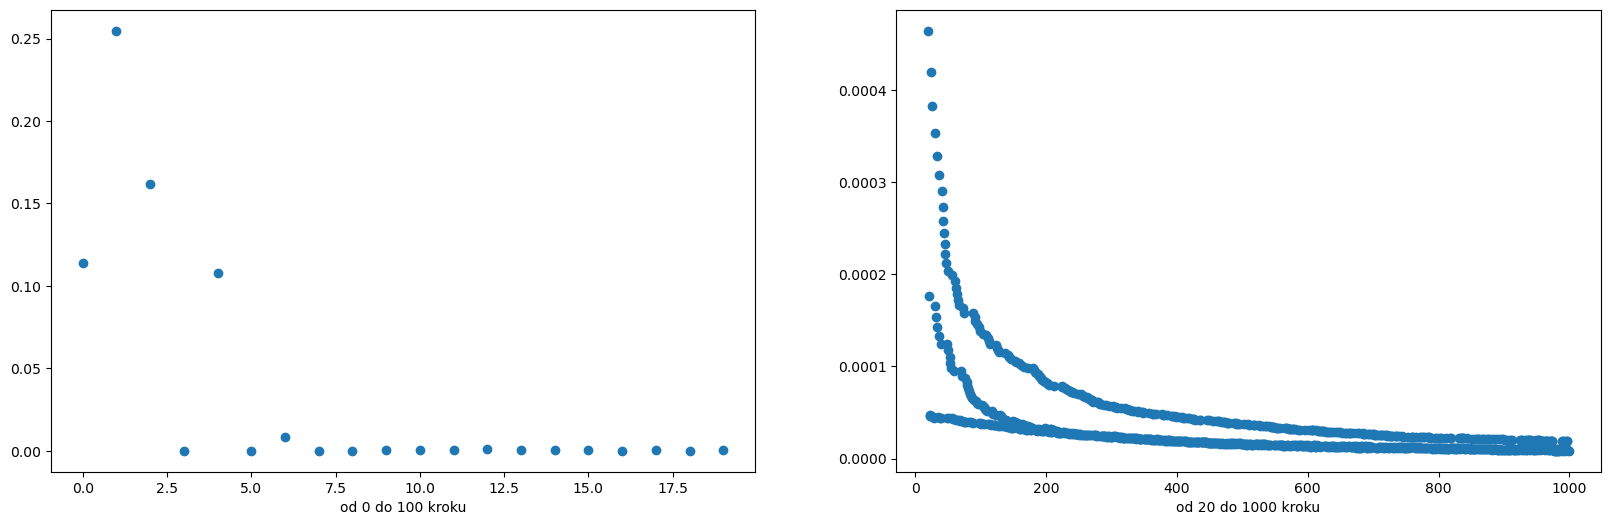

In [7]:
#MSE 
fig, ax = plt.subplots(1,2,figsize=(20,6))
krok = np.arange(1000)
ax[0].scatter(krok[0:20] , MSE[0:20])
ax[0].set_xlabel('od 0 do 100 kroku')
ax[1].scatter(krok[20:], MSE[20:] )
ax[1].set_xlabel('od 20 do 1000 kroku')
plt.show()



In [8]:
print("---------------------------------")
x_test = np.array([2, 0.2, 0.3, 0.1, 0.05])

przewidywania= calculate1(W_optimal, x_test)
print(przewidywania)

---------------------------------
[0.58 0.28 0.01]
